In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [334]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [335]:
df.shape

(15, 2)

In [336]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [337]:
df.isnull().sum()  #no missing data 

#no cleaning requied 

Chirps/Second         0
Ground Temperature    0
dtype: int64

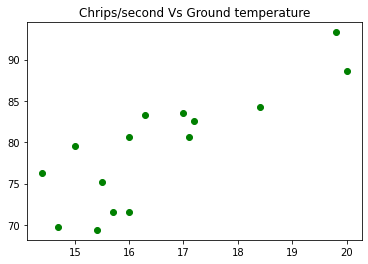

In [338]:
plt.plot(df["Chirps/Second"].values,df["Ground Temperature"].values,'og')
plt.title("Chrips/second Vs Ground temperature")
plt.show()

In [339]:
df.corr()

# as the correlation is well above 0.2 there is a linear relationship between the input and output features

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [340]:
X = df["Chirps/Second"].values       
y = df["Ground Temperature"].values  

#splitting the dataset df
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [341]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 

LinearRegression()

In [342]:
c=regressor.intercept_
c[0]

23.318187660668364

In [343]:
m=regressor.coef_
m[0][0]

3.416372107969151

In [344]:
print("The linear regression equation : {:.2f}(chirps/second) +{:.2f}".format(m[0][0],c[0]))

The linear regression equation : 3.42(chirps/second) +23.32


In [345]:
y_pred=regressor.predict(X_test.reshape(-1,1))
y_pred

array([[81.3965135 ],
       [77.98014139],
       [77.98014139],
       [91.64562982],
       [73.53885765]])

In [346]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


#eqaution is not that good fit for the data 

R2- SCORE: 0.7031200383097671


In [347]:
#when ground temperature is 95 

#95 =3.18(x)+26.164
x=(95-26.164)/3.18
print("chirps/second :",round(x,1) ,"when ground temperature is equal to 95")

chirps/second : 21.6 when ground temperature is equal to 95


In [348]:
#when the chirps/second =18 then the ground temperature would be 

print("when the chirps/second =18 then the ground temperature would be " ,round(regressor.predict([[18]])[0][0],1))

when the chirps/second =18 then the ground temperature would be  84.8


Trying with SGD regrssor 

In [349]:
from sklearn.linear_model import SGDRegressor #SGD stands for Stochastic Gradient Descent: the gradient
sgd = SGDRegressor(penalty=None,max_iter=100000,tol=0.001,eta0=0.0001,learning_rate='constant')
sgd.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=100000,
             penalty=None)

In [350]:
sgd.intercept_

array([0.29502819])

In [351]:
sgd.coef_

array([4.80298412])

In [352]:
sgd.predict([[18]])

array([86.74874233])

In [353]:
sgd_y_pred=sgd.predict(X_test.reshape(-1,1))
sgd_y_pred

array([81.94575821, 77.14277409, 77.14277409, 96.35471057, 70.89889474])

In [354]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,sgd_y_pred))

R2- SCORE: 0.5833790024890517


Trying after scaling 

In [355]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialisation 
scaler.fit(X_train.reshape(-1,1)) # find the values of mu and sigma
X_train = scaler.transform(X_train.reshape(-1,1))
X_test = scaler.transform(X_test.reshape(-1,1)) #only transform the test dataset, dont fit it

In [356]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 

LinearRegression()

In [357]:
regressor.intercept_

array([79.62])

In [358]:
regressor.coef_

array([[5.39051123]])

In [359]:
y_pred=regressor.predict(X_test)

In [360]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#no improvement in score even after scaling 

R2- SCORE: 0.7031200383097671


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [479]:
df = pd.read_fwf("brain_body.txt")

In [480]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [481]:
df.shape

(62, 2)

In [482]:
df.describe()

#as the gap between 75 th percentile and max is too large we can say there is extreme value in data which affect the model

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [483]:
df.isnull().sum()  #no need of cleaning 

Brain    0
Body     0
dtype: int64

In [484]:
# determing the outliers in brain column 
q1,q3=np.percentile(df["Brain"],[25,75]) 
print("25th percentile:",q1 ,"75th percentile:",q3)

IQR=q3-q1
print("IQR for Brain is :" ,IQR)

upper=q3+1.5*IQR
lower=q1-1.5*IQR

print("upper for brain :",upper,"lower for brain :",lower)
list1=[]
for i in df["Brain"].values:
   if i<upper and i>lower :
     list1.append(i)

print(list1)


25th percentile: 0.6000000000000001 75th percentile: 48.2025
IQR for Brain is : 47.6025
upper for brain : 119.60625 lower for brain : -70.80375000000001
[3.385, 0.48, 1.35, 36.33, 27.66, 14.83, 1.04, 4.19, 0.425, 0.101, 0.92, 1.0, 0.005, 0.06, 3.5, 2.0, 1.7, 0.023, 0.785, 10.0, 3.3, 0.2, 1.41, 85.0, 0.75, 62.0, 3.5, 6.8, 35.0, 4.05, 0.12, 0.023, 0.01, 1.4, 2.5, 55.5, 100.0, 52.16, 10.55, 0.55, 60.0, 3.6, 4.288, 0.28, 0.075, 0.122, 0.048, 3.0, 0.9, 1.62, 0.104, 4.235]


In [485]:
#determing the outlier in Body column
q1,q3=np.percentile(df["Body"],[25,75]) 
print("25th percentile:",q1 ,"75th percentile:",q3)

IQR=q3-q1
print("IQR for Body is :" ,IQR)

upper=q3+1.5*IQR
lower=q1-1.5*IQR

print("upper for Body :",upper,"lower for Body :",lower)
list2=[]
for i in df["Body"].values:
   if i<upper and i>lower :
     list2.append(i)

print(list2)

25th percentile: 4.25 75th percentile: 166.0
IQR for Body is : 161.75
upper for Body : 408.625 lower for Body : -238.375
[44.5, 15.5, 8.1, 119.5, 115.0, 98.2, 5.5, 58.0, 6.4, 4.0, 5.7, 6.6, 0.14, 1.0, 10.8, 12.3, 6.3, 0.3, 3.5, 115.0, 25.6, 5.0, 17.5, 406.0, 325.0, 12.3, 3.9, 179.0, 56.0, 17.0, 1.0, 0.4, 0.25, 12.5, 12.1, 175.0, 157.0, 179.5, 2.4, 81.0, 21.0, 39.2, 1.9, 1.2, 3.0, 0.33, 180.0, 25.0, 169.0, 2.6, 11.4, 2.5, 50.4]


In [486]:
df=df[(df["Brain"].isin(list1))&(df["Body"].isin(list2))]
df

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


In [487]:
df.describe()   # from 62 rows 12 rows have been deleted as outlier or extreme values 

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


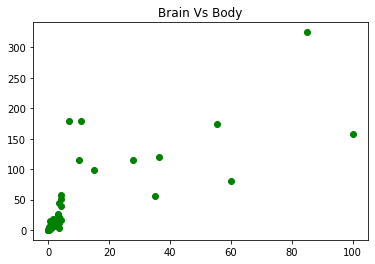

In [488]:
plt.scatter(df["Brain"].values,df["Body"].values,color='g')
plt.title("Brain Vs Body")
plt.show()

In [489]:
df.corr()
#there is strong positive correlation between the inputfeature(Brain) and output feature (Body)

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [490]:
X=df["Brain"].values   #values is necessary to convert Series object to array
y=df["Body"].values

In [491]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [492]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 

LinearRegression()

In [493]:
c=regressor.intercept_

In [494]:
m=regressor.coef_

In [495]:
print("The linear regression equation : {:.2f}(Brain) +{:.2f}".format(m[0][0],c[0]))

The linear regression equation : 2.23(Brain) +19.93


In [496]:
y_pred=regressor.predict(X_test.reshape(-1,1))

In [497]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))   #r2 score is good 

R2- SCORE: 0.767043514966202


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [380]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [381]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [382]:
df.shape

(52, 6)

In [383]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [384]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

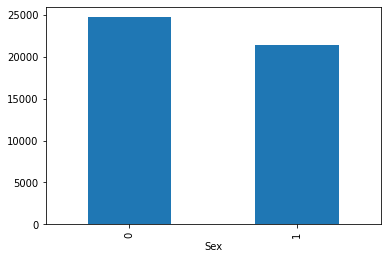

In [385]:
df.groupby("Sex")["Salary"].mean().plot(kind="bar")

#0---> male amd 1--> female 

In [386]:
df[["Sex","Salary"]].corr()

#there is very low relationship between salary and sex 

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


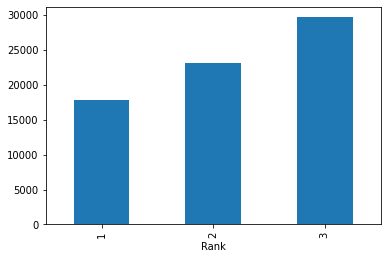

In [387]:
df.groupby("Rank")["Salary"].mean().plot(kind="bar")

In [388]:
df[["Rank","Salary"]].corr()
#Rank has very good positive correlation with salary

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


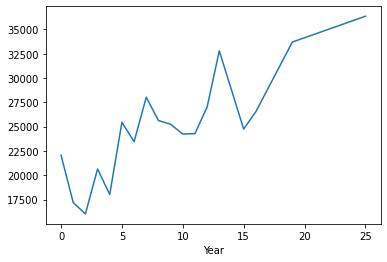

In [389]:
df.groupby("Year")["Salary"].mean().plot(kind="line")

In [390]:
df[["Year","Salary"]].corr()

#Year has got good positive relationship with output varibale Salary

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


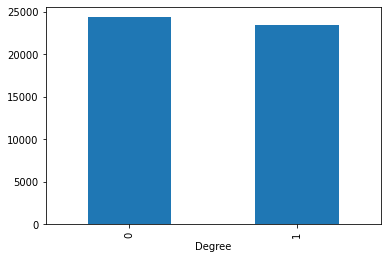

In [391]:
#Degree. Highest degree. 1 for doctorate, 0 for master's.
df.groupby("Degree")["Salary"].mean().plot(kind="bar")

In [392]:
df[["Degree","Salary"]].corr()

#Degree is no relationship with the output variable salary so that we can drop it 

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


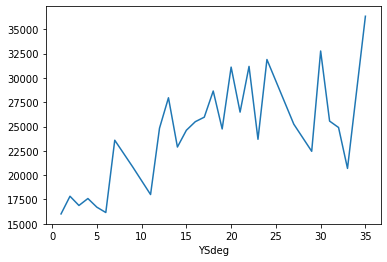

In [393]:
#YSdeg. Years since highest degree was earned.
df.groupby("YSdeg")["Salary"].mean().plot(kind="line")

In [394]:
df[["YSdeg","Salary"]].corr()

#has positive correlation with the Salary

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [395]:
X=df[["Sex", "Rank", "Year","YSdeg"]]
y=df["Salary"].values

In [396]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [397]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [398]:
m=regressor.intercept_
m

10198.178462481053

In [399]:
c=regressor.coef_
c

array([1623.26809428, 5345.518644  ,  459.43243673,  -62.60046238])

In [400]:
print("The linear regression equation : {:.2f}(Sex)+{:.2f}(Rank)+{:.2f}(Year)+{:.2f}(YSdeg) +{:.2f}".format(m,c[0],c[1],c[2],c[3]))

The linear regression equation : 10198.18(Sex)+1623.27(Rank)+5345.52(Year)+459.43(YSdeg) +-62.60


In [401]:
coeff_df = pd.DataFrame(regressor.coef_,index=["Sex", "Rank", "Year","YSdeg"], columns=['Coefficient'])

In [402]:
coeff_df

,Coefficient
Sex,1623.268094
Rank,5345.518644
Year,459.432437
YSdeg,-62.600462


In [403]:
regressor.predict([[1,2,5,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([24183.64140463])

In [404]:
y_preds=regressor.predict(X_test)

In [405]:
y_test

array([18075, 19175, 22906, 21600, 36350, 28516, 23713, 28200, 15350,
       17250, 20690, 24832, 26775, 17095, 22450, 29342])

In [406]:
y_preds

array([16671.59256716, 21454.80545946, 24544.53318211, 20822.28263239,
       35529.5291295 , 32271.04367223, 18802.18256376, 29305.41846462,
       17960.62914947, 18357.46112383, 22284.39833317, 24272.90213252,
       29383.81706164, 17131.02500389, 23453.66505615, 28511.75451592])

In [407]:
new_df=pd.DataFrame({"Actaul":y_test,"Predicted":y_preds})
new_df

,Actaul,Predicted
0,18075,16671.592567
1,19175,21454.805459
2,22906,24544.533182
3,21600,20822.282632
4,36350,35529.529130
5,28516,32271.043672
6,23713,18802.182564
7,28200,29305.418465
8,15350,17960.629149
9,17250,18357.461124


In [408]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_preds))

#0.84 is the R2 score 

R2- SCORE: 0.8497902303023295


In [409]:
 # sequential feature selector for getting best R2 score for model 
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)  # finding top 2 features
sfs.fit(X_train, y_train)
print(list(zip(["Sex", "Rank", "Year","YSdeg"],sfs.get_support())))

[('Sex', False), ('Rank', True), ('Year', True), ('YSdeg', False)]


In [410]:
X=df[["Rank", "Year"]]
y=df["Salary"].values

In [411]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [412]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [413]:
m=regressor.intercept_
m

11258.626371597567

In [414]:
c=regressor.coef_
c

array([4866.2172088 ,  343.55440757])

In [415]:
print("The linear regression equation : {:.2f}(Rank)+{:.2f}(Year)+{:.2f}".format(m,c[0],c[1]))

The linear regression equation : 11258.63(Rank)+4866.22(Year)+343.55


In [416]:
y_preds=regressor.predict(X_test)

In [417]:
y_preds

array([20991.0607892 , 16811.95239555, 27575.05003588, 17499.0612107 ,
       18873.278841  , 24770.15927252, 16811.95239555, 28949.26766618,
       28262.15885103, 19216.83324857, 30323.48529647])

In [418]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_preds))

#0.89 is the R2 score  
#we get better r2 score after doing the feature selection 

R2- SCORE: 0.8967546695900388
